In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("accepted_only_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072705 entries, 0 to 2072704
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   loan_amnt         float64
 2   title             object 
 3   fico_range_low    int64  
 4   fico_range_high   int64  
 5   dti               float64
 6   zip_code          object 
 7   addr_state        object 
 8   emp_length        object 
 9   emp_title         object 
 10  funded_amnt       float64
 11  hardship_flag     object 
 12  home_ownership    object 
 13  loan_status       object 
 14  application_type  object 
 15  issue_d           object 
 16  policy_code       int64  
 17  Applicant_Result  int64  
 18  int_rate          float64
dtypes: float64(4), int64(5), object(10)
memory usage: 300.5+ MB


In [4]:
df.isnull().sum()

Unnamed: 0          0
loan_amnt           0
title               0
fico_range_low      0
fico_range_high     0
dti                 0
zip_code            0
addr_state          0
emp_length          0
emp_title           0
funded_amnt         0
hardship_flag       0
home_ownership      0
loan_status         0
application_type    0
issue_d             0
policy_code         0
Applicant_Result    0
int_rate            0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate
0,0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99
1,1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99
2,2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85
3,3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45
4,4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44


In [6]:
df['home_ownership'].value_counts()

MORTGAGE    1026198
RENT         828421
OWN          217129
ANY             738
OTHER           174
NONE             45
Name: home_ownership, dtype: int64

The any, other, and none categories are very small and make up a small portion of the overall customers. They will not be considered.

In [7]:
df_new = df[~df['home_ownership'].isin(['OTHER', 'ANY', 'NONE'])]

Comparing the new data frame with the original. The difference in the distribution.

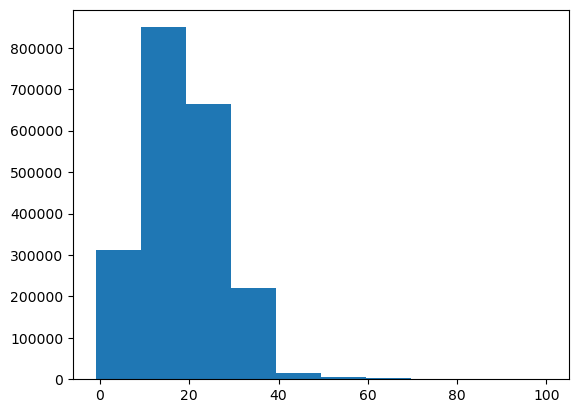

In [8]:
plt.hist(df['dti'][df['dti']<=100])
plt.show()

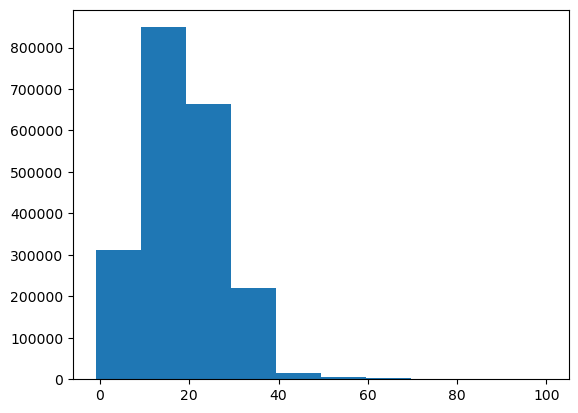

In [9]:
plt.hist(df_new['dti'][df_new['dti']<=100])
plt.show()

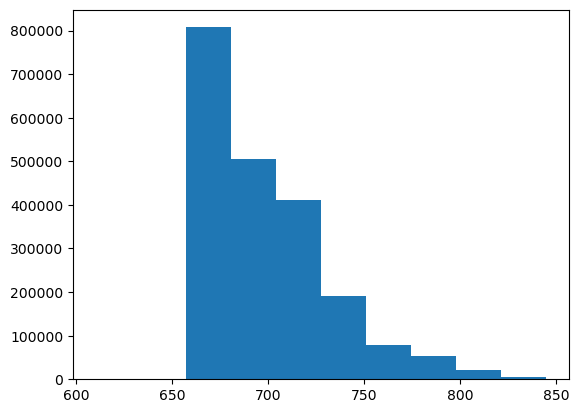

In [10]:
plt.hist(df['fico_range_low'][df['dti']<=100])
plt.show()

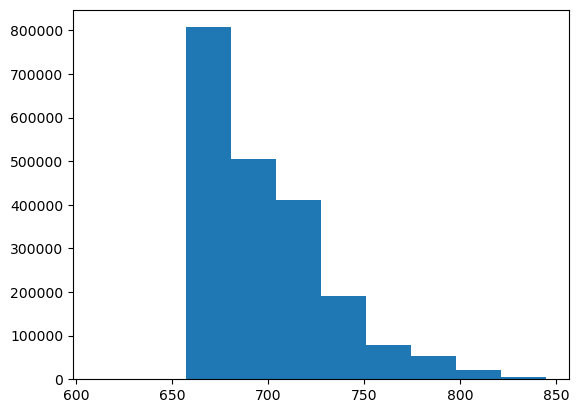

In [11]:
plt.hist(df_new['fico_range_low'][df_new['dti']<=100])
plt.show()

In [12]:
grouped_values = df_new.groupby(['home_ownership', 'application_type', 'hardship_flag'])['fico_range_low'].median()

In [13]:
grouped_values = pd.DataFrame(grouped_values)

In [14]:
grouped_values.reset_index(inplace=True)

In [15]:
sorted_df = grouped_values.sort_values(by='fico_range_low',ascending=False).head()
sorted_df.reset_index(inplace=True,drop=True)
sorted_df.rename(columns={"home_ownership": "Ownership", "application_type": "Application Type", 
                          "hardship_flag": "Hardship Flag", "fico_range_low": "FICO Score"}, inplace=True)
sorted_df

,Ownership,Application Type,Hardship Flag,FICO Score
0,OWN,Joint App,Y,720.0
1,OWN,Joint App,N,710.0
2,MORTGAGE,Joint App,N,705.0
3,MORTGAGE,Joint App,Y,700.0
4,RENT,Joint App,N,700.0


In [16]:
grouped_values_dti = df_new.groupby(['home_ownership', 'application_type', 'hardship_flag'])['dti'].median()

In [17]:
grouped_values_dti = pd.DataFrame(grouped_values_dti)

In [20]:
grouped_values_dti.reset_index(inplace=True)

In [21]:
sorted_df = grouped_values_dti.sort_values(by='dti', ascending=True).head()
sorted_df.reset_index(inplace=True,drop=True)
sorted_df.rename(columns={"home_ownership": "Ownership", "application_type": "Application Type", 
                          "hardship_flag": "Hardship Flag", "dti": "Debt-to-Income Ratio"}, inplace=True)
sorted_df

,Ownership,Application Type,Hardship Flag,Debt-to-Income Ratio
0,OWN,Joint App,Y,11.90
1,RENT,Individual,N,17.30
2,RENT,Individual,Y,17.49
3,MORTGAGE,Individual,N,17.61
4,OWN,Individual,Y,17.70
